<a href="https://colab.research.google.com/github/thanhsonopera/2324I_INT3303_20/blob/main/M0D_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def ask_modulation(bits, fc, fs):
    t = np.arange(0, len(bits) / fs, 1 / fs)
    carrier = np.cos(2 * np.pi * fc * t)
    signal = np.zeros(len(t))
    for i, bit in enumerate(bits):
        if bit == 1:
            signal[int(i * fs) : int((i + 1) * fs)] = carrier[int(i * fs) : int((i + 1) * fs)]
        else:
            signal[int(i * fs) : int((i + 1) * fs)] = 0
    return t, signal

In [ ]:
def fsk_modulation(bits, f1, f2, fs):
    t = np.arange(0, len(bits) / fs, 1 / fs)
    signal = np.zeros(len(t))
    for i, bit in enumerate(bits):
        if bit == 0:
            signal[int(i * fs) : int((i + 1) * fs)] = np.cos(2 * np.pi * f1 * t[int(i * fs) : int((i + 1) * fs)])
        elif bit == 1:
            signal[int(i * fs) : int((i + 1) * fs)] = np.cos(2 * np.pi * f2 * t[int(i * fs) : int((i + 1) * fs)])
    return t, signal

In [ ]:
def psk_modulation(bits, fc, fs):
    t = np.arange(0, len(bits) / fs, 1 / fs)
    carrier = np.cos(2 * np.pi * fc * t)
    signal = np.zeros(len(t))
    for i, bit in enumerate(bits):
        if bit == 1:
            signal[int(i * fs) : int((i + 1) * fs)] = 30*carrier[int(i * fs) : int((i + 1) * fs)]
        elif bit == 0:
            signal[int(i * fs) : int((i + 1) * fs)] = 30*-carrier[int(i * fs) : int((i + 1) * fs)]
    return t, signal

In [ ]:
bits = input("Nhập chuỗi bit (0 hoặc 1): ")
module = input("Nhập kiểu điều chế(ask hoặc fsk hoặc psk): ")

# Chuyển chuỗi bit thành mảng số nguyên
bits = np.array([int(bit) for bit in bits])

# Nhập các thông số khác
fc = float(input("Nhập tần số cơ bản (fc): "))
fs = float(input("Nhập tần số lấy mẫu (fs): "))

Nhập chuỗi bit (0 hoặc 1): 10101
Nhập kiểu điều chế(ask hoặc fsk hoặc psk): ask
Nhập tần số cơ bản (fc): 30
Nhập tần số lấy mẫu (fs): 800


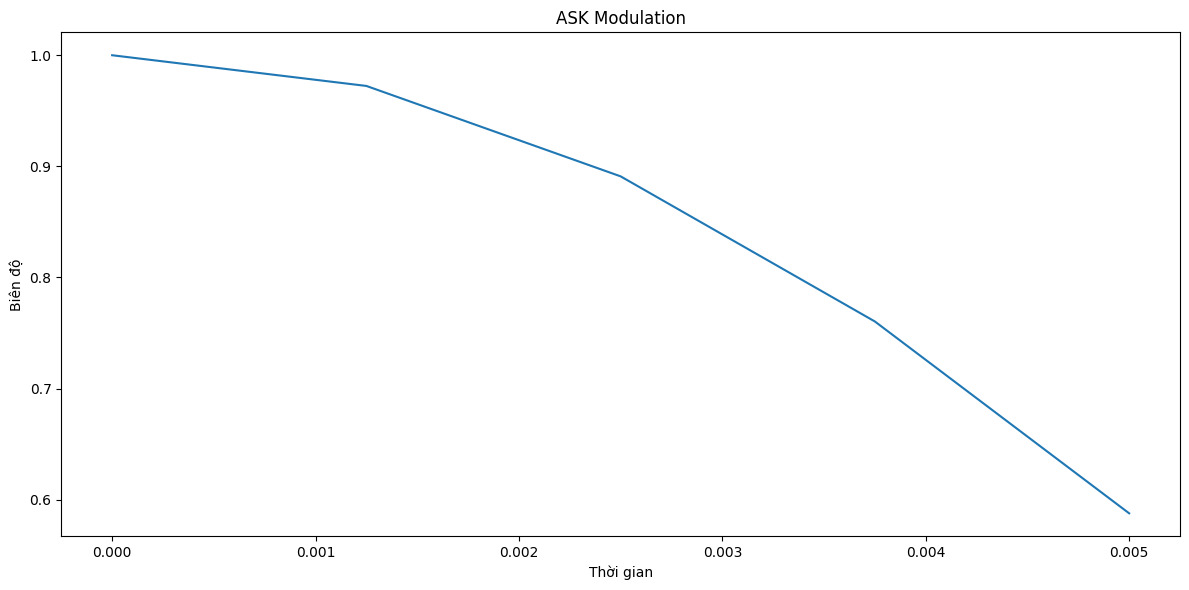

In [ ]:
plt.figure(figsize=(12, 6))

# Điều chế ASK
if (module == "ask"):

    t_ask, signal_ask = ask_modulation(bits, fc, fs)

    plt.plot(t_ask, signal_ask)
    plt.xlabel('Thời gian')
    plt.ylabel('Biên độ')
    plt.title('ASK Modulation')

elif (module == "fsk"):

    f1 = fc - fs/2
    f2 = fc + fs/2
    t_fsk, signal_fsk = fsk_modulation(bits, f1, f2, fs)

    plt.plot(t_fsk, signal_fsk)
    plt.xlabel('Thời gian')
    plt.ylabel('Biên độ')
    plt.title('FSK Modulation')

else:

    t_psk, signal_psk = psk_modulation(bits, fc, fs)

    plt.plot(t_psk, signal_psk)
    plt.xlabel('Thời gian')
    plt.ylabel('Biên độ')
    plt.title('PSK Modulation')

plt.tight_layout()
plt.show()